# Lecture Fourier Transform 2
---

### Introduction
This next section of part C will introduce the **convolution** of two functions $f$ and $g$. The convolution operation will turn out to be very important when we study linear systems. Subsequently we will study the response of a linear system due to a Dirac-Pulse (this is called the **impulse response function**). 

#### The convolution
As an introductory example consider a noisy signal $s(t)$ as shown in the upper figure below. Suppose you want to smoothen this signal. One way to carry out this smoothening is to take another function $w(t)$ (for instance a box-shaped or a gaussian function) and perform at each time $t$ a weighted average of the signal $s(t)$ with $w(t)$. In mathemtical terms: At each time $t$ you multiply $s$ and $w$ and integrate. This operation is called **convolution**.

1.0

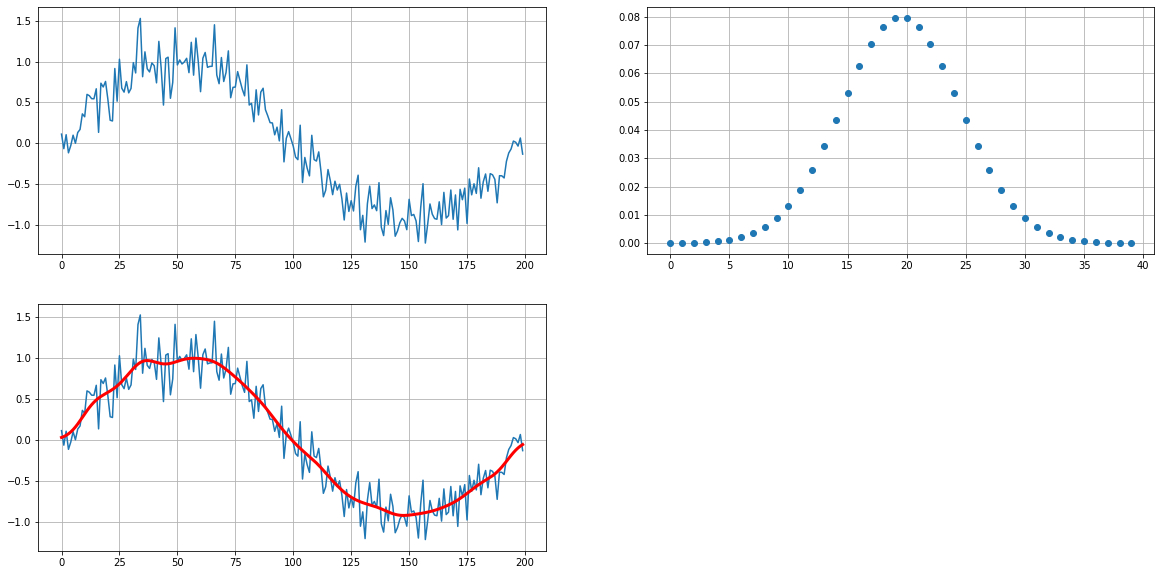

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(0,2*np.pi,200)
s = np.sin(t) + 0.2*np.random.randn(t.size)

plt.figure(figsize=[20,10])
plt.subplot(221)
plt.grid()
plt.plot(s)


# Smoothen (i.e. convolve) the signal s(t) with a gaussian filter
N = np.int(40)
w = signal.gaussian(N,std=5)
w = w/np.sum(w)
#w = 1/N*np.ones(N)
s_smooth = np.convolve(s,w,mode='same')
# Plot the Gaussian filter
plt.subplot(222)
plt.grid()
plt.plot(w,'o')
# Plot the convolved signal
plt.subplot(223)
plt.plot(s)
plt.grid()
plt.plot(s_smooth,'r',linewidth=3)
np.sum(w)

4.42396870204683

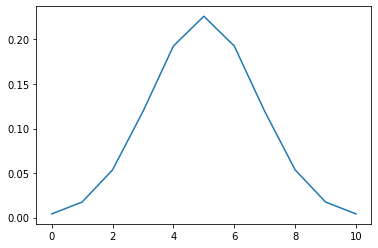

In [17]:
x = np.linspace(-2,2,11)
plt.plot(np.exp(-x**2)/np.sum(np.exp(-x**2)))
np.sum(np.exp(-x**2))

The **convolution** of two functions $f(t)$ and $g(t)$ is defined as
$$
f(t)\ast g(t) = (f\ast g)(t) = \int_{-\infty}^{\infty}f(t-\tau)g(\tau)\mathrm{d}\tau = 
\int_{-\infty}^{\infty}f(\tau)g(t-\tau)\mathrm{d}\tau = (g\ast f)(t) = g(t)\ast f(t)
$$


The **discete convolution** for two array $a$ and $b$ (with array sizes $m$ and $n$) results in an array $c$ (of size $m+n-1$) with
$$
c_k = (a \ast b)_k  = \sum_{i} a_i b_{k-i}\,, 
$$
where the sum extends over all allowed indices. An example of a discrete convolution is given in the code below.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

g = 0.5*np.ones(2)
f = np.array([1, 2, 3,4, 5])
f,g
np.convolve(g,f,mode='same')

array([0.5, 1.5, 2.5, 3.5, 4.5])

#### Fourier transform of the convolution
As shown in the lecture the Fourier transform of the convolution $f(t)\ast g(t)$ is given by
$$
f(t) \ast g(t) \quad \Laplace \quad F(\omega)\cdot G(\omega)\,.
$$
Hence, the complicated convolution operation in the time domain turns out as a simple multiplication in the
frequency domain.

#### Basic notions of linear system theory
As an introductory example we consider an $RC$-circuit as depicted in the figure below.
<img src="rc_circuit.png" height="200" width="500"/>
Supose we have given the input voltage $U_i(t)$, the resistance $R$ and the capacity $C$. The fundamental question in 
linear system theory is: what is the output voltage $U_o(t)$?

Kirchhoff's circuit laws tell us that
$$
U_i(t) = U_R(t) + U_c(t) = I_R(T)R + U_o(t) = I_C(T)R + U_o(t) = RC\dot{U}_o(t) + U_o(t)
$$
This may be written as
$$
\left(RC\frac{\mathrm{d}}{\mathrm{d}t}+1\right)U_o(t) = U_i(t)
$$
This is the general form of linear system with a single input and a single output (SISO-system). We generalize: the input $x(t)$ and
the output $y(t)$ of a SISO-system a connected via the ordinary differential equation
$$
\left(a_n\frac{\mathrm{d}^n}{\mathrm{dt}^n} + 
a_{n-1}\frac{\mathrm{d}^{n-1}}{\mathrm{dt}^{n-1}} + 
a_1\frac{\mathrm{d}}{\mathrm{dt}}
+ a_0 \right)y(t) = 
\left(b_m\frac{\mathrm{d}^m}{\mathrm{dt}^m} + 
a_{m-1}\frac{\mathrm{d}^{m-1}}{\mathrm{dt}^{m-1}} + 
b_1\frac{\mathrm{d}}{\mathrm{dt}}
+ b_0 \right)
x(t)
$$

#### Impuls response function

Consider the Dirac-delta-pulse as an input to a SISO-system, i.e. $x(t) = \delta(t)$. The so called **impulse response function** $h(t)$ is the response/output of the system due to the pulse-input (in this particular case, where the input is given by the $\delta$-function, the output $y(t)$ is called $h(t)$). In mathematical terms
$$
L\,h(t) = \delta(t)
$$
As an example we consider again the $RC$-circuit from above, i.e.
$$
\left(RC\frac{\mathrm{d}}{\mathrm{d}t}+1\right)h(t) = \delta(t)\,.
$$
To determine $h(t)$ we transform the equation from the time domain in the frequency domain (i.e. perform a Fourier
transform). We end up with
$$
(RC i\omega+1)H(\omega) = 1 \quad \Rightarrow \quad H(\omega) = \frac{1}{i\omega RC+1} = \frac{1}{RC}\frac{1}{i\omega+\frac{1}{RC}}\,.
$$
The function $H(\omega)$ (so Fourier transform of the impulse response function) is called the **transfer function**.
Transforming back to the time domain (compare exercise 2 (b) from C.1) yields
$$
h(t) = \frac{1}{RC}\Theta(t)e^{-\frac{1}{RC}t}\, .
$$